In [ ]:
!pip install wordcloud
!pip install imblearn
nltk.download('stopwords')
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Reading the data
ens_learn = pd.read_csv('ulasantiktok.csv')
ens_learn_copy = ens_learn
# Checking first 10 rows of data
ens_learn.head(10)

,userName,at,content,score
0,Pengguna Google,2025-04-19 01:04:55,"untuk apk ini Bagusss banget!! aku suka, tapi ...",4
1,Pengguna Google,2025-04-26 16:02:49,"tiktok sekarang kenapa? bug nya lumayan jelek,...",1
2,Pengguna Google,2025-04-10 13:06:40,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2
3,Pengguna Google,2025-04-27 10:25:10,saya sangat kecewa karena akhir akhir ini lag ...,5
4,Pengguna Google,2025-04-12 07:07:10,"apk ny bagus juga sangat menghibur, tpi kenapa...",4
5,Pengguna Google,2025-04-11 01:36:47,"apk ini bagus,cuma ada bug yang saya alami sep...",4
6,Pengguna Google,2025-04-25 06:52:05,heran banget download tiktok lama banget padah...,1
7,Pengguna Google,2025-04-11 00:15:15,setelah update terbaru tiktok jadi tidak suppo...,1
8,Pengguna Google,2025-04-24 04:37:57,"tiktok ku tbtb lag dan susah keakses awalnya, ...",1
9,Pengguna Google,2025-04-26 15:52:10,gimana ya?jujur apk nya bagus bisa buat hibura...,2


In [ ]:
# Checking Last 5 rows of dataset

ens_learn.tail()

,userName,at,content,score
9995,Septi Nurjanah,2024-11-30 07:32:51,Mon maap tiktok kenapa ya udh beberapa hari in...,1
9996,Dsni Muni,2024-11-30 06:59:16,pasti kalo udah buka aplikasi lainya gak bisa ...,3
9997,ida maslua,2025-03-16 06:07:02,punyaku kok ga ada fitur terbaru sih padahal u...,3
9998,Wira Barnes,2024-11-19 10:36:04,Sy kan mau update tiktok trs sy kan update git...,2
9999,Vina Afifah,2025-02-02 22:18:59,bagus sih cuman kadang nge bug aja kadang suka...,3


In [ ]:
# Checking number of rows and columns

ens_learn.shape

(10000, 4)

In [ ]:
# Names of columns

ens_learn.columns

Index(['userName', 'at', 'content', 'score'], dtype='object')

In [ ]:
# complete information of data with datatypes of columns

ens_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   at        10000 non-null  object
 2   content   10000 non-null  object
 3   score     10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
#Checking number of null values

ens_learn.isna().sum()

,0
userName,0
at,0
content,0
score,0


In [ ]:
# Checking the initial date of reviews

ens_learn['at'].min()

'2024-11-04 23:20:13'

In [ ]:
# Checking last date of reviews

ens_learn['at'].max()

'2025-05-03 13:21:55'

In [ ]:
# number of duplicates

print(ens_learn.duplicated().loc[lambda x : x == True].count())

0


Labelling

In [ ]:
# labeling

ens_learn['label'] = ens_learn['score'].map({1:0, 2:0, 3:2, 4:1, 5:1})
ens_learn['category'] = ens_learn['score'].map({1:'negative',
                                                2:'negative',
                                                3:'neutral', 4:'positive',
                                                5:'positive'})
ens_learn.head()

,userName,at,content,score,label,category
0,Pengguna Google,2025-04-19 01:04:55,"untuk apk ini Bagusss banget!! aku suka, tapi ...",4,1,positive
1,Pengguna Google,2025-04-26 16:02:49,"tiktok sekarang kenapa? bug nya lumayan jelek,...",1,0,negative
2,Pengguna Google,2025-04-10 13:06:40,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,0,negative
3,Pengguna Google,2025-04-27 10:25:10,saya sangat kecewa karena akhir akhir ini lag ...,5,1,positive
4,Pengguna Google,2025-04-12 07:07:10,"apk ny bagus juga sangat menghibur, tpi kenapa...",4,1,positive


In [ ]:
# case folding

def clean_text(text):
  return re.sub('[^a-zA-Z]', ' ', text).lower()
ens_learn['cleaned_text'] = ens_learn['content'].apply(lambda x: clean_text(x))
ens_learn.head()

,userName,at,content,score,label,category,cleaned_text
0,Pengguna Google,2025-04-19 01:04:55,"untuk apk ini Bagusss banget!! aku suka, tapi ...",4,1,positive,untuk apk ini bagusss banget aku suka tapi ...
1,Pengguna Google,2025-04-26 16:02:49,"tiktok sekarang kenapa? bug nya lumayan jelek,...",1,0,negative,tiktok sekarang kenapa bug nya lumayan jelek ...
2,Pengguna Google,2025-04-10 13:06:40,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,0,negative,maaf bukan bermaksud menjelekan tetapi aplikas...
3,Pengguna Google,2025-04-27 10:25:10,saya sangat kecewa karena akhir akhir ini lag ...,5,1,positive,saya sangat kecewa karena akhir akhir ini lag ...
4,Pengguna Google,2025-04-12 07:07:10,"apk ny bagus juga sangat menghibur, tpi kenapa...",4,1,positive,apk ny bagus juga sangat menghibur tpi kenapa...


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

all_stopwords = stopwords.words('indonesian')
all_stopwords.remove('tidak')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Removing the URl

def rem_url(cleaned_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',cleaned_text)

# Removing the stepwords 'indonesian'

def rem_stopwords(cleaned_text):
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in (stopwords.words('indonesian'))])
    return cleaned_text

# Removing the html

def rem_html(cleaned_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',cleaned_text)

def remove_at_mentions(cleaned_text):
    return re.sub(r'@\w+', '', cleaned_text)


# Removing emojis by codes

def rem_emoji(cleaned_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', cleaned_text)

# Fixing the cleaned_text

def fixing(cleaned_text):
    cleaned_text = re.sub(r"jembut", " buruk", cleaned_text)
    return cleaned_text

# Seperate alphabets

def sep_alphabets(cleaned_text):
    words = cleaned_text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


def review_to_words(review):
    letters_only = re.sub("[^a-zA-Z]", " ",review)
    words = letters_only.lower().split()
    stops = set(stopwords.words("indonesian"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

ens_learn['filtered_text'] = ens_learn['cleaned_text']

ens_learn['filtered_text'] = ens_learn['filtered_text'].astype(str).apply(remove_at_mentions)
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_url(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_stopwords(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_html(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_emoji(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : sep_alphabets(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : review_to_words(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].astype(str).replace("jembut", "buruk", regex=True)


# result

ens_learn['filtered_text']

,filtered_text
0,apk bagusss banget suka udh tik tok ku bermasa...
1,tiktok bug nya lumayan jelek suka tib loading ...
2,maaf menjelekan aplikasi bagus lancar pengguna...
3,kecewa lag nya parahhhhhhhhh tiktok bug contoh...
4,apk ny bagus menghibur tpi update filter tikto...
...,...
9995,mon maap tiktok ya udh gak masuk uninstall dlu...
9996,kalo udah buka aplikasi lainya gak buka kalo h...
9997,punyaku ga fitur terbaru sih udah update berka...
9998,sy update tiktok trs sy update gitu sy pencet ...


In [ ]:
filtered_text = stopwords.words('indonesian')
ens_learn['filtered_text'] = ens_learn['filtered_text']
ens_learn.head()

,userName,at,content,score,label,category,cleaned_text,filtered_text
0,Pengguna Google,2025-04-19 01:04:55,"untuk apk ini Bagusss banget!! aku suka, tapi ...",4,1,positive,untuk apk ini bagusss banget aku suka tapi ...,apk bagusss banget suka udh tik tok ku bermasa...
1,Pengguna Google,2025-04-26 16:02:49,"tiktok sekarang kenapa? bug nya lumayan jelek,...",1,0,negative,tiktok sekarang kenapa bug nya lumayan jelek ...,tiktok bug nya lumayan jelek suka tib loading ...
2,Pengguna Google,2025-04-10 13:06:40,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,0,negative,maaf bukan bermaksud menjelekan tetapi aplikas...,maaf menjelekan aplikasi bagus lancar pengguna...
3,Pengguna Google,2025-04-27 10:25:10,saya sangat kecewa karena akhir akhir ini lag ...,5,1,positive,saya sangat kecewa karena akhir akhir ini lag ...,kecewa lag nya parahhhhhhhhh tiktok bug contoh...
4,Pengguna Google,2025-04-12 07:07:10,"apk ny bagus juga sangat menghibur, tpi kenapa...",4,1,positive,apk ny bagus juga sangat menghibur tpi kenapa...,apk ny bagus menghibur tpi update filter tikto...


In [ ]:
# tokenizing

def tokenize_text(text):
  tokenized_text = text.split()
  return tokenized_text
ens_learn['tokens'] = ens_learn['filtered_text'].apply(lambda x: tokenize_text(x))
ens_learn.head()

,userName,at,content,score,label,category,cleaned_text,filtered_text,tokens
0,Pengguna Google,2025-04-19 01:04:55,"untuk apk ini Bagusss banget!! aku suka, tapi ...",4,1,positive,untuk apk ini bagusss banget aku suka tapi ...,apk bagusss banget suka udh tik tok ku bermasa...,"[apk, bagusss, banget, suka, udh, tik, tok, ku..."
1,Pengguna Google,2025-04-26 16:02:49,"tiktok sekarang kenapa? bug nya lumayan jelek,...",1,0,negative,tiktok sekarang kenapa bug nya lumayan jelek ...,tiktok bug nya lumayan jelek suka tib loading ...,"[tiktok, bug, nya, lumayan, jelek, suka, tib, ..."
2,Pengguna Google,2025-04-10 13:06:40,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,0,negative,maaf bukan bermaksud menjelekan tetapi aplikas...,maaf menjelekan aplikasi bagus lancar pengguna...,"[maaf, menjelekan, aplikasi, bagus, lancar, pe..."
3,Pengguna Google,2025-04-27 10:25:10,saya sangat kecewa karena akhir akhir ini lag ...,5,1,positive,saya sangat kecewa karena akhir akhir ini lag ...,kecewa lag nya parahhhhhhhhh tiktok bug contoh...,"[kecewa, lag, nya, parahhhhhhhhh, tiktok, bug,..."
4,Pengguna Google,2025-04-12 07:07:10,"apk ny bagus juga sangat menghibur, tpi kenapa...",4,1,positive,apk ny bagus juga sangat menghibur tpi kenapa...,apk ny bagus menghibur tpi update filter tikto...,"[apk, ny, bagus, menghibur, tpi, update, filte..."


In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer Bahasa Indonesia
stemmer = StemmerFactory().create_stemmer()

# Fungsi Lemmatisasi (Stemming) untuk Bahasa Indonesia
def stem_text(token_list):
    return " ".join([stemmer.stem(token) for token in token_list])

# Menerapkan Stemming pada DataFrame
ens_learn['stemmed_review'] = ens_learn['tokens'].apply(lambda x: stem_text(x))
ens_learn.head()

,userName,at,content,score,label,category,cleaned_text,filtered_text,tokens,stemmed_review
0,Pengguna Google,2025-04-19 01:04:55,"untuk apk ini Bagusss banget!! aku suka, tapi ...",4,1,positive,untuk apk ini bagusss banget aku suka tapi ...,apk bagusss banget suka udh tik tok ku bermasa...,"[apk, bagusss, banget, suka, udh, tik, tok, ku...",apk bagusss banget suka udh tik tok ku masalah...
1,Pengguna Google,2025-04-26 16:02:49,"tiktok sekarang kenapa? bug nya lumayan jelek,...",1,0,negative,tiktok sekarang kenapa bug nya lumayan jelek ...,tiktok bug nya lumayan jelek suka tib loading ...,"[tiktok, bug, nya, lumayan, jelek, suka, tib, ...",tiktok bug nya lumayan jelek suka tib loading ...
2,Pengguna Google,2025-04-10 13:06:40,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,0,negative,maaf bukan bermaksud menjelekan tetapi aplikas...,maaf menjelekan aplikasi bagus lancar pengguna...,"[maaf, menjelekan, aplikasi, bagus, lancar, pe...",maaf jelek aplikasi bagus lancar guna wifi kuo...
3,Pengguna Google,2025-04-27 10:25:10,saya sangat kecewa karena akhir akhir ini lag ...,5,1,positive,saya sangat kecewa karena akhir akhir ini lag ...,kecewa lag nya parahhhhhhhhh tiktok bug contoh...,"[kecewa, lag, nya, parahhhhhhhhh, tiktok, bug,...",kecewa lag nya parahhhhhhhhh tiktok bug contoh...
4,Pengguna Google,2025-04-12 07:07:10,"apk ny bagus juga sangat menghibur, tpi kenapa...",4,1,positive,apk ny bagus juga sangat menghibur tpi kenapa...,apk ny bagus menghibur tpi update filter tikto...,"[apk, ny, bagus, menghibur, tpi, update, filte...",apk ny bagus hibur tpi update filter tiktok ny...


In [ ]:
from IPython.display import display
display(ens_learn)

,userName,at,content,score,label,category,cleaned_text,filtered_text,tokens,stemmed_review
0,Pengguna Google,2025-04-19 01:04:55,"untuk apk ini Bagusss banget!! aku suka, tapi ...",4,1,positive,untuk apk ini bagusss banget aku suka tapi ...,apk bagusss banget suka udh tik tok ku bermasa...,"[apk, bagusss, banget, suka, udh, tik, tok, ku...",apk bagusss banget suka udh tik tok ku masalah...
1,Pengguna Google,2025-04-26 16:02:49,"tiktok sekarang kenapa? bug nya lumayan jelek,...",1,0,negative,tiktok sekarang kenapa bug nya lumayan jelek ...,tiktok bug nya lumayan jelek suka tib loading ...,"[tiktok, bug, nya, lumayan, jelek, suka, tib, ...",tiktok bug nya lumayan jelek suka tib loading ...
2,Pengguna Google,2025-04-10 13:06:40,"maaf bukan bermaksud menjelekan tetapi,aplikas...",2,0,negative,maaf bukan bermaksud menjelekan tetapi aplikas...,maaf menjelekan aplikasi bagus lancar pengguna...,"[maaf, menjelekan, aplikasi, bagus, lancar, pe...",maaf jelek aplikasi bagus lancar guna wifi kuo...
3,Pengguna Google,2025-04-27 10:25:10,saya sangat kecewa karena akhir akhir ini lag ...,5,1,positive,saya sangat kecewa karena akhir akhir ini lag ...,kecewa lag nya parahhhhhhhhh tiktok bug contoh...,"[kecewa, lag, nya, parahhhhhhhhh, tiktok, bug,...",kecewa lag nya parahhhhhhhhh tiktok bug contoh...
4,Pengguna Google,2025-04-12 07:07:10,"apk ny bagus juga sangat menghibur, tpi kenapa...",4,1,positive,apk ny bagus juga sangat menghibur tpi kenapa...,apk ny bagus menghibur tpi update filter tikto...,"[apk, ny, bagus, menghibur, tpi, update, filte...",apk ny bagus hibur tpi update filter tiktok ny...
...,...,...,...,...,...,...,...,...,...,...
9995,Septi Nurjanah,2024-11-30 07:32:51,Mon maap tiktok kenapa ya udh beberapa hari in...,1,0,negative,mon maap tiktok kenapa ya udh beberapa hari in...,mon maap tiktok ya udh gak masuk uninstall dlu...,"[mon, maap, tiktok, ya, udh, gak, masuk, unins...",mon maap tiktok ya udh gak masuk uninstall dlu...
9996,Dsni Muni,2024-11-30 06:59:16,pasti kalo udah buka aplikasi lainya gak bisa ...,3,2,neutral,pasti kalo udah buka aplikasi lainya gak bisa ...,kalo udah buka aplikasi lainya gak buka kalo h...,"[kalo, udah, buka, aplikasi, lainya, gak, buka...",kalo udah buka aplikasi lai gak buka kalo hp n...
9997,ida maslua,2025-03-16 06:07:02,punyaku kok ga ada fitur terbaru sih padahal u...,3,2,neutral,punyaku kok ga ada fitur terbaru sih padahal u...,punyaku ga fitur terbaru sih udah update berka...,"[punyaku, ga, fitur, terbaru, sih, udah, updat...",punya ga fitur baru sih udah update kali kali
9998,Wira Barnes,2024-11-19 10:36:04,Sy kan mau update tiktok trs sy kan update git...,2,0,negative,sy kan mau update tiktok trs sy kan update git...,sy update tiktok trs sy update gitu sy pencet ...,"[sy, update, tiktok, trs, sy, update, gitu, sy...",sy update tiktok trs sy update gitu sy pencet ...


In [ ]:
# Check the number of sentiments based on the rating
# shape of the dataset, and breakdown of the classes

print(f"Input data has {len(ens_learn)} rows and {len(ens_learn.columns)} columns")
print(f"rating 1 = {len(ens_learn[ens_learn['score']==1])} rows")
print(f"rating 2 = {len(ens_learn[ens_learn['score']==2])} rows")
print(f"rating 3 = {len(ens_learn[ens_learn['score']==3])} rows")
print(f"rating 4 = {len(ens_learn[ens_learn['score']==4])} rows")
print(f"rating 5 = {len(ens_learn[ens_learn['score']==5])} rows")

Input data has 10000 rows and 10 columns
rating 1 = 4260 rows
rating 2 = 1666 rows
rating 3 = 1505 rows
rating 4 = 1088 rows
rating 5 = 1481 rows


Number of null in label: 0
Number of null in text: 0


<Axes: xlabel='score', ylabel='count'>

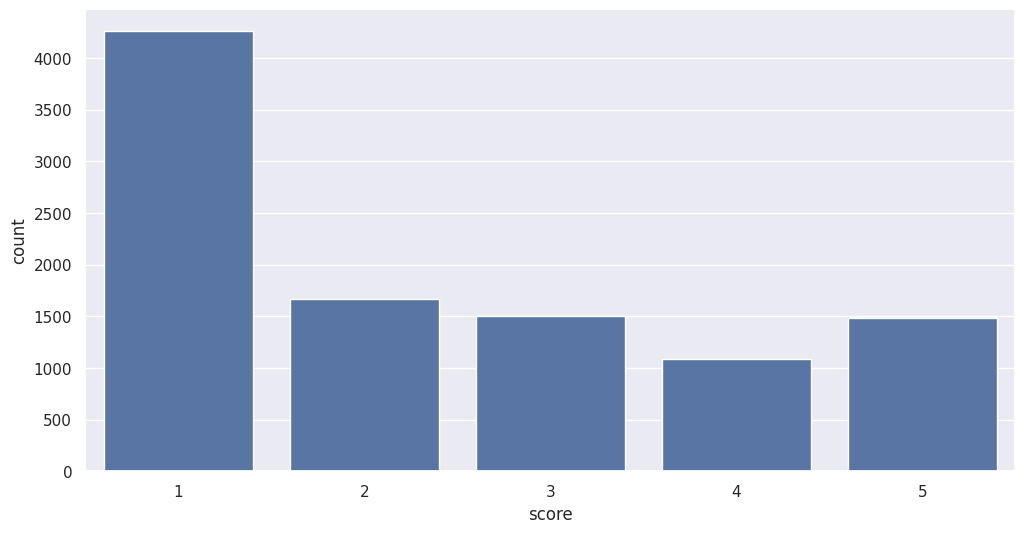

In [ ]:
# Missing values in the dataset

print(f"Number of null in label: { ens_learn['score'].isnull().sum() }")
print(f"Number of null in text: { ens_learn['content'].isnull().sum() }")
sb.countplot(x='score', data=ens_learn)

Number of null in label: 0
Number of null in text: 0
category
negative    5926
positive    2569
neutral     1505
Name: count, dtype: int64


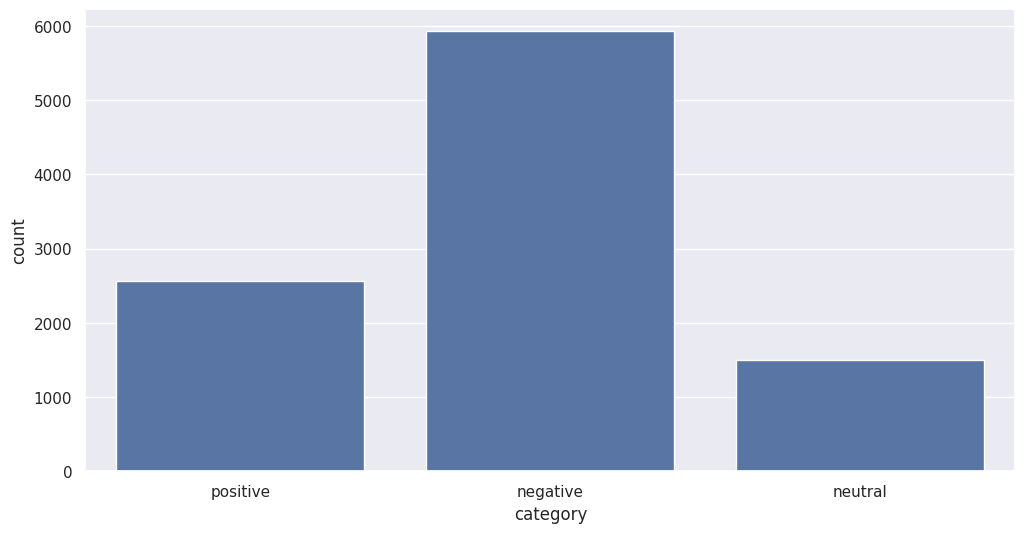

In [ ]:
print(f"Number of null in label: { ens_learn['category'].isnull().sum() }")
print(f"Number of null in text: { ens_learn['content'].isnull().sum() }")
sb.countplot(x='category', data=ens_learn)
print(ens_learn['category'].value_counts())


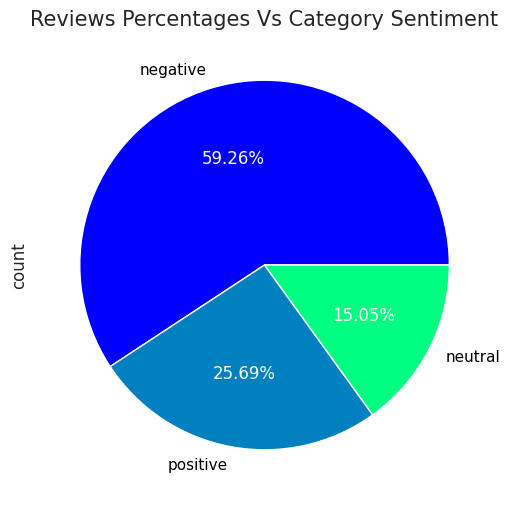

In [ ]:
# Checking percentages from each category
plt.title("Reviews Percentages Vs Category Sentiment", fontsize=15)
ax = ens_learn.category.value_counts().plot(
    kind='pie', autopct='%1.2f%%', cmap="winter",
)

# Set label angka persentase menjadi warna putih
for text in ax.texts:
    # Jika teks adalah persentase (di dalam diagram), ubah warnanya menjadi putih
    if '%' in text.get_text():
        text.set_color('white')
    # Jika teks adalah label (di luar diagram), ubah warnanya menjadi hitam
    else:
        text.set_color('black')

plt.show()

In [ ]:
# Separation of dataset based on rating value ('score')

ens_learn_positive = ens_learn[ (ens_learn['score']==4) | (ens_learn['score']==5)]
ens_learn_neutral = ens_learn[ (ens_learn['score']==3)]
ens_learn_negative = ens_learn[ (ens_learn['score']==1) | (ens_learn['score']==2)]

#convert to list
positive_list = ens_learn_positive['stemmed_review'].tolist()
neutral_list = ens_learn_neutral['stemmed_review'].tolist()
negative_list = ens_learn_negative['stemmed_review'].tolist()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of spam
filtered_positive = filtered_positive.lower()

filtered_neutral = ("").join(str(neutral_list)) #convert the list into a string of spam
filtered_neutral = filtered_neutral.lower()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

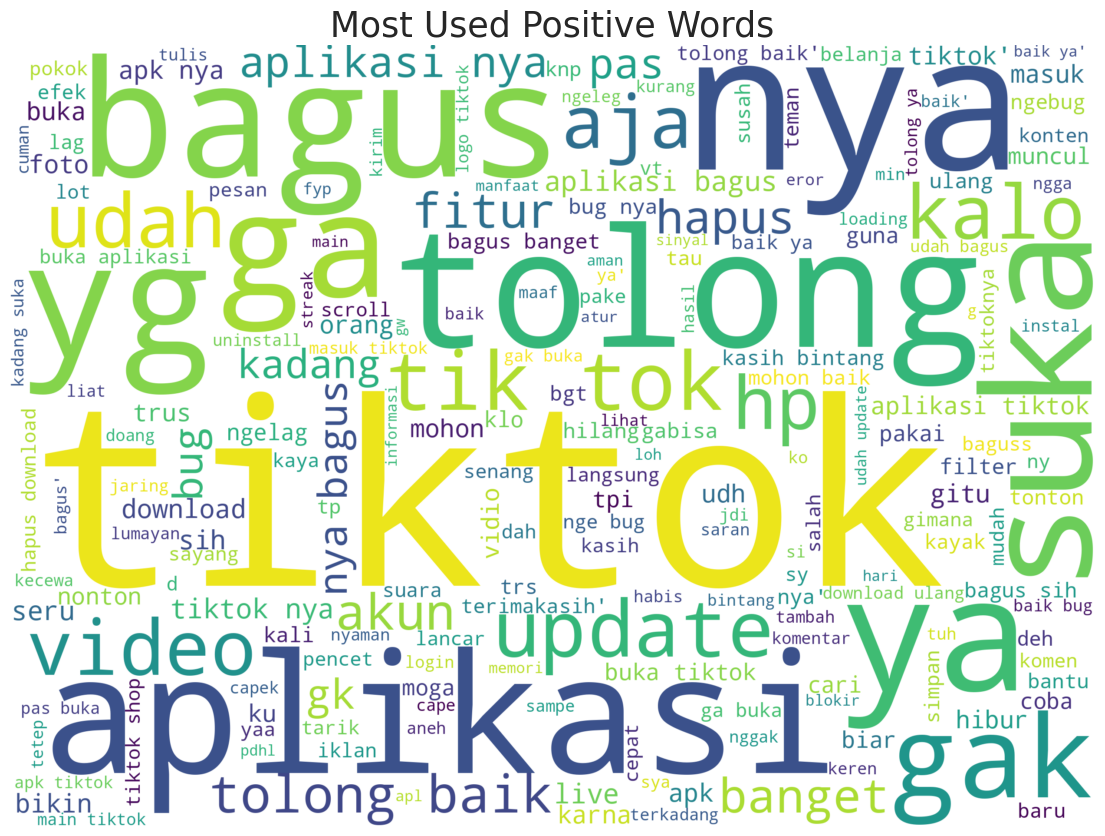

In [ ]:
ens_learn_temp =ens_learn

ens_learn_temp['stemmed_review'].map(lambda x: re.sub('[,\.!?]', '', x))
ens_learn_temp['stemmed_review'].map(lambda x: x.lower())
pos_cloud=ens_learn_temp[ens_learn_temp['stemmed_review']=='positive']

word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='White',
                      width=2500,
                      height=1800
                     ).generate(filtered_positive)
plt.figure(1,figsize=(14, 14))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Positive Words', fontsize=25)
plt.show()

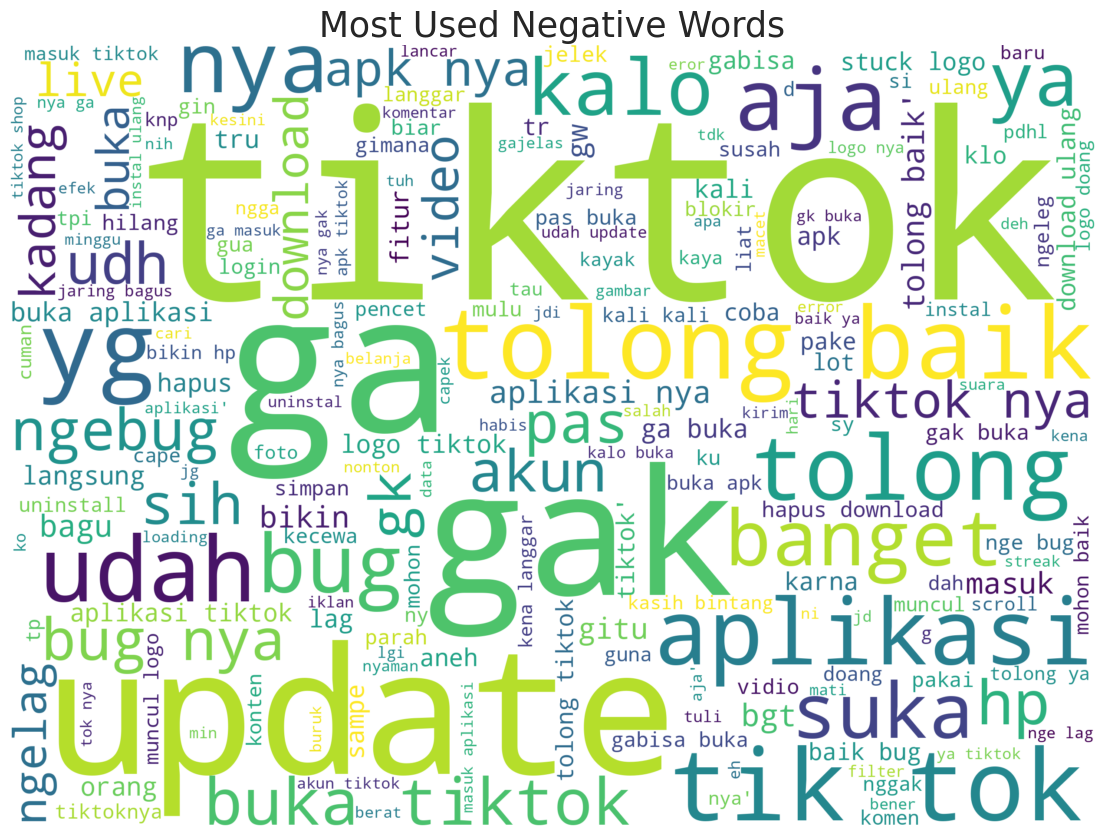

In [ ]:
ens_learn_temp =ens_learn

ens_learn_temp['stemmed_review'].map(lambda x: re.sub('[,\.!?]', '', x))
ens_learn_temp['stemmed_review'].map(lambda x: x.lower())
neg_cloud=ens_learn_temp[ens_learn_temp['stemmed_review']=='negative']

word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='White',
                      width=2500,
                      height=1800
                     ).generate(filtered_negative)
plt.figure(1,figsize=(14, 14))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Negative Words', fontsize=25)
plt.show()

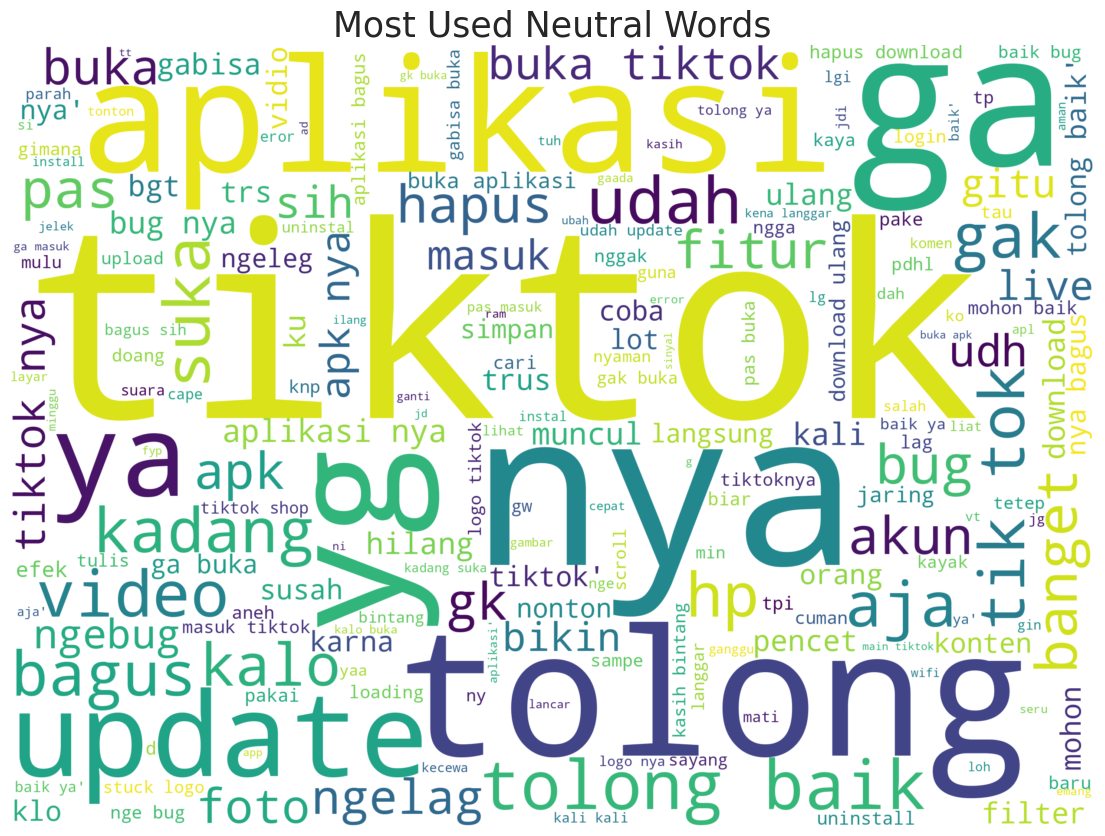

In [ ]:
ens_learn_temp =ens_learn

ens_learn_temp['stemmed_review'].map(lambda x: re.sub('[,\.!?]', '', x))
ens_learn_temp['stemmed_review'].map(lambda x: x.lower())
neut_cloud=ens_learn_temp[ens_learn_temp['stemmed_review']=='neutral']

word_cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='White',
                      width=2500,
                      height=1800
                     ).generate(filtered_neutral)
plt.figure(1,figsize=(14, 14))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Neutral Words', fontsize=25)
plt.show()

# Preparation

In [ ]:
!pip install transformers

In [ ]:
#from transformers import BertTokenizer

#print("Loading BERT Tokenizer")
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

#from transformers import BertTokenizer

#print("Loading BERT Tokenizer")
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

from transformers import BertTokenizer

print("Loading IndoBERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased', do_lower_case=True)

#from transformers import BertTokenizer

#print("Loading IndoBERT Tokenizer")
#tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-cased', do_lower_case=False)


Loading IndoBERT Tokenizer


In [ ]:
sentences = ens_learn.stemmed_review.values
labels = ens_learn.label.values

In [ ]:
print("Original: ", sentences[51])

print("Tokenized: ", tokenizer.tokenize (sentences[51]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[51])))

Original:  udah update versi baru tiktok nya gabisa buka cuman muncul logo nya doang pdhl jaring wifi d rmh bagus bgt tolong min cepat benerin lg kaum cinta scrol tiktok pd kesel tiktok nya gbs buka samsek udh d coba ttep gabisa
Tokenized:  ['udah', 'update', 'versi', 'baru', 'tik', '##to', '##k', 'nya', 'gab', '##isa', 'buka', 'cuman', 'muncul', 'logo', 'nya', 'doa', '##ng', 'pd', '##hl', 'jaring', 'wi', '##fi', 'd', 'rm', '##h', 'bagus', 'bg', '##t', 'tolong', 'min', 'cepat', 'bener', '##in', 'lg', 'kaum', 'cinta', 'sc', '##rol', 'tik', '##to', '##k', 'pd', 'kesel', 'tik', '##to', '##k', 'nya', 'gb', '##s', 'buka', 'sams', '##ek', 'ud', '##h', 'd', 'coba', 'tt', '##ep', 'gab', '##isa']
Token IDS:  [9988, 16971, 3869, 1836, 4667, 2088, 942, 2647, 4819, 5367, 9012, 22713, 2812, 11944, 2647, 5702, 9402, 4135, 4074, 15502, 7371, 2787, 46, 7516, 945, 4839, 22562, 930, 9917, 2118, 3218, 13927, 1488, 17849, 2800, 3663, 2491, 6698, 4667, 2088, 942, 4135, 3413, 4667, 2088, 942, 2647, 17964, 9

In [ ]:
print("Original: ", sentences[69])

print("Tokenized: ", tokenizer.tokenize (sentences[69]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[69])))

Original:  baguss tp update kemaren jd bugg gatau bug tp jujur bikin ga nyaman vidio yg tonton scroll trus scroll lg vidio jd hitam sebenernya udah rasain update vidio hitam ga jalan mas aja update knpa parahh tolong kalo bug baik ya jjur ga nyaman
Tokenized:  ['bagus', '##s', 'tp', 'update', 'kemar', '##en', 'jd', 'bug', '##g', 'gat', '##au', 'bug', 'tp', 'jujur', 'bikin', 'ga', 'nyaman', 'vid', '##io', 'yg', 'tonton', 'sc', '##roll', 'trus', 'sc', '##roll', 'lg', 'vid', '##io', 'jd', 'hitam', 'seben', '##ernya', 'udah', 'rasa', '##in', 'update', 'vid', '##io', 'hitam', 'ga', 'jalan', 'mas', 'aja', 'update', 'kn', '##pa', 'parah', '##h', 'tolong', 'kalo', 'bug', 'baik', 'ya', 'j', '##jur', 'ga', 'nyaman']
Token IDS:  [4839, 944, 11358, 16971, 4015, 1478, 26964, 9554, 938, 6509, 1802, 9554, 11358, 8020, 9929, 5311, 8015, 3813, 5532, 3798, 17559, 2491, 24409, 20700, 2491, 24409, 17849, 3813, 5532, 26964, 4155, 2846, 21636, 9988, 2745, 1488, 16971, 3813, 5532, 4155, 5311, 2050, 1609, 638

In [ ]:
input_ids = []

for sent in sentences:
    # Tokenisasi kalimat tanpa menambahkan token [CLS] dan [SEP]
    tokens = tokenizer.tokenize(sent)

    # Menambahkan token [CLS] di awal dan [SEP] di akhir
    tokens = ['[CLS]'] + tokens + ['[SEP]']

    # Mengonversi token menjadi ID menggunakan tokenizer
    encoded_sent = tokenizer.convert_tokens_to_ids(tokens)

    input_ids.append(encoded_sent)

# Menampilkan hasil untuk salah satu kalimat
print("Original: ", sentences[51])
print("Tokenized: ", tokenizer.tokenize (sentences[51]))
print("Token IDs: ", input_ids[51])


Original:  udah update versi baru tiktok nya gabisa buka cuman muncul logo nya doang pdhl jaring wifi d rmh bagus bgt tolong min cepat benerin lg kaum cinta scrol tiktok pd kesel tiktok nya gbs buka samsek udh d coba ttep gabisa
Tokenized:  ['udah', 'update', 'versi', 'baru', 'tik', '##to', '##k', 'nya', 'gab', '##isa', 'buka', 'cuman', 'muncul', 'logo', 'nya', 'doa', '##ng', 'pd', '##hl', 'jaring', 'wi', '##fi', 'd', 'rm', '##h', 'bagus', 'bg', '##t', 'tolong', 'min', 'cepat', 'bener', '##in', 'lg', 'kaum', 'cinta', 'sc', '##rol', 'tik', '##to', '##k', 'pd', 'kesel', 'tik', '##to', '##k', 'nya', 'gb', '##s', 'buka', 'sams', '##ek', 'ud', '##h', 'd', 'coba', 'tt', '##ep', 'gab', '##isa']
Token IDs:  [3, 9988, 16971, 3869, 1836, 4667, 2088, 942, 2647, 4819, 5367, 9012, 22713, 2812, 11944, 2647, 5702, 9402, 4135, 4074, 15502, 7371, 2787, 46, 7516, 945, 4839, 22562, 930, 9917, 2118, 3218, 13927, 1488, 17849, 2800, 3663, 2491, 6698, 4667, 2088, 942, 4135, 3413, 4667, 2088, 942, 2647, 17964

In [ ]:
# Check the longest sentence(token)

print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  116


In [ ]:
!pip install tensorflow
from keras.preprocessing.sequence import pad_sequences

MAX_LEN =65

print("Padding/trucating all sentence to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/trucating all sentence to 65 values
Padding token: "[PAD]", ID: 0
Done


In [ ]:
input_ids[51]

array([    3,  9988, 16971,  3869,  1836,  4667,  2088,   942,  2647,
        4819,  5367,  9012, 22713,  2812, 11944,  2647,  5702,  9402,
        4135,  4074, 15502,  7371,  2787,    46,  7516,   945,  4839,
       22562,   930,  9917,  2118,  3218, 13927,  1488, 17849,  2800,
        3663,  2491,  6698,  4667,  2088,   942,  4135,  3413,  4667,
        2088,   942,  2647, 17964,   944,  9012, 13781,  1533,  2727,
         945,    46,  6008, 16206,  1655,  4819,  5367,     4,     0,
           0,     0])

In [ ]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent] # - Jika ID token adalah 0, maka itu adalah padding, set mask ke 0.
                                                      # - Jika ID token > 0, maka itu adalah token asli, set mask ke 1.

  attention_mask.append(att_mask)

In [ ]:
# Misalkan batas adalah 10
batas = 10

for i in range(0, len(attention_mask[51]), batas):
    print(attention_mask[51][i:i+batas])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 0]


In [ ]:
from sklearn.model_selection import train_test_split

# Use 70% for training and 30% for validation.
train_input, test_input, train_labels, test_labels = train_test_split(input_ids,
                                                                      labels,
                                                                      random_state=42,  # mengatur seed agar pembagian dataset dapat direproduksi
                                                                      test_size=0.2)
# Do the same for the masks.
train_mask, test_mask, _, _ = train_test_split(attention_mask,
                                               labels,
                                               random_state=42,
                                               test_size=0.2)

In [ ]:
import numpy as np
print("== Train ==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("\n== Test ==")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

== Train ==
Input:  (8000, 65)
Label:  (8000,)
Mask:  (8000, 65)

== Test ==
Input:  (2000, 65)
Label:  (2000,)
Mask:  (2000, 65)


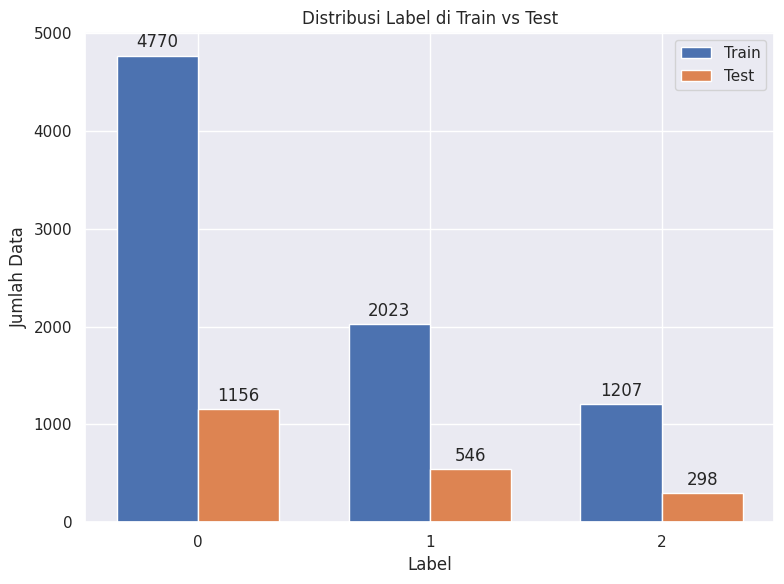

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Konversi label ke numpy array kalau belum
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Hitung jumlah tiap label
unique_labels = np.unique(np.concatenate([train_labels, test_labels]))

train_counts = [np.sum(train_labels == label) for label in unique_labels]
test_counts = [np.sum(test_labels == label) for label in unique_labels]

# Plot
x = np.arange(len(unique_labels))  # lokasi label di x-axis
width = 0.35  # lebar bar

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, test_counts, width, label='Test')

# Tambahkan teks, label, title, dan legend
ax.set_xlabel('Label')
ax.set_ylabel('Jumlah Data')
ax.set_title('Distribusi Label di Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(unique_labels)
ax.legend()

# Tampilkan jumlah di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # jarak sedikit di atas bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.get_device_name(0))  # Harus keluar: "Tesla T4"

Tesla T4


In [ ]:
train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [ ]:
# Membuat DataLoader dalam PyTorch

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our testing set.
test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Modeling

In [ ]:
from transformers import BertForSequenceClassification, BertConfig
from torch.optim import AdamW


model = BertForSequenceClassification.from_pretrained(
    "indolem/indobert-base-uncased",
    num_labels=3,
    output_attentions=False,
    output_hidden_states=False
)

model.to(device)  # <- ini yang benar


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31923, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

total_params = sum(p.numel() for p in model.parameters())
print("==== Total Parameters ====")
print(f'Total Parameters: {total_params}')

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (31923, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.e

In [ ]:
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 10

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = total_steps)

In [ ]:
import numpy as np

# Menghitung akurasi prediksi model terhadap label pada suatu tugas klasifikasi.
def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

# Mengelola waktu yang diukur dalam detik dan mengembalikan waktu yang diformat dengan representasi jam:menit:detik
def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np
import torch
import time
import datetime
# --------------
# PERSIAPAN AWAL
# --------------
# Setting Seed for reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Initialize optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Learning rate scheduler
epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Helper functions
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    elapsed_rounded = int(round(elapsed))
    return str(datetime.timedelta(seconds=elapsed_rounded))

# Training Model
loss_values = []
for epoch_i in range(0, epochs):
    print(f"\n======= Epoch {epoch_i+1} / {epochs} =======")
    print("Training...")
    t0 = time.time()

    total_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print(f"Batch {step:>5,} of {len(train_dataloader):>5,}. Elapsed: {elapsed}.")

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_train_loss)
    print(f"   Average training loss: {avg_train_loss:.2f}")
    print(f"   Training epoch took: {format_time(time.time() - t0)}")

print("\nTraining complete!")

# --------------
# Pengujian Model
# --------------
print("\nRunning Testing...")

t0 = time.time()
model.eval()

test_accuracy = 0
nb_test_steps = 0
prediction, true_labels = [], []

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    prediction.append(logits)
    true_labels.append(label_ids)

    # Calculate test accuracy
    tmp_accuracy = flat_accuracy(logits, label_ids)
    test_accuracy += tmp_accuracy
    nb_test_steps += 1

avg_test_accuracy = test_accuracy / nb_test_steps
print(f"   Accuracy: {avg_test_accuracy:.2f}")
print(f"   Testing took: {format_time(time.time() - t0)}")


======= Epoch 1 / 10 =======
Training...
Batch    10 of   500. Elapsed: 0:00:02.
Batch    20 of   500. Elapsed: 0:00:04.
Batch    30 of   500. Elapsed: 0:00:07.
Batch    40 of   500. Elapsed: 0:00:09.
Batch    50 of   500. Elapsed: 0:00:11.
Batch    60 of   500. Elapsed: 0:00:13.
Batch    70 of   500. Elapsed: 0:00:16.
Batch    80 of   500. Elapsed: 0:00:18.
Batch    90 of   500. Elapsed: 0:00:20.
Batch   100 of   500. Elapsed: 0:00:22.
Batch   110 of   500. Elapsed: 0:00:25.
Batch   120 of   500. Elapsed: 0:00:27.
Batch   130 of   500. Elapsed: 0:00:29.
Batch   140 of   500. Elapsed: 0:00:31.
Batch   150 of   500. Elapsed: 0:00:33.
Batch   160 of   500. Elapsed: 0:00:35.
Batch   170 of   500. Elapsed: 0:00:37.
Batch   180 of   500. Elapsed: 0:00:39.
Batch   190 of   500. Elapsed: 0:00:42.
Batch   200 of   500. Elapsed: 0:00:44.
Batch   210 of   500. Elapsed: 0:00:46.
Batch   220 of   500. Elapsed: 0:00:48.
Batch   230 of   500. Elapsed: 0:00:50.
Batch   240 of   500. Elapsed: 0:00:52

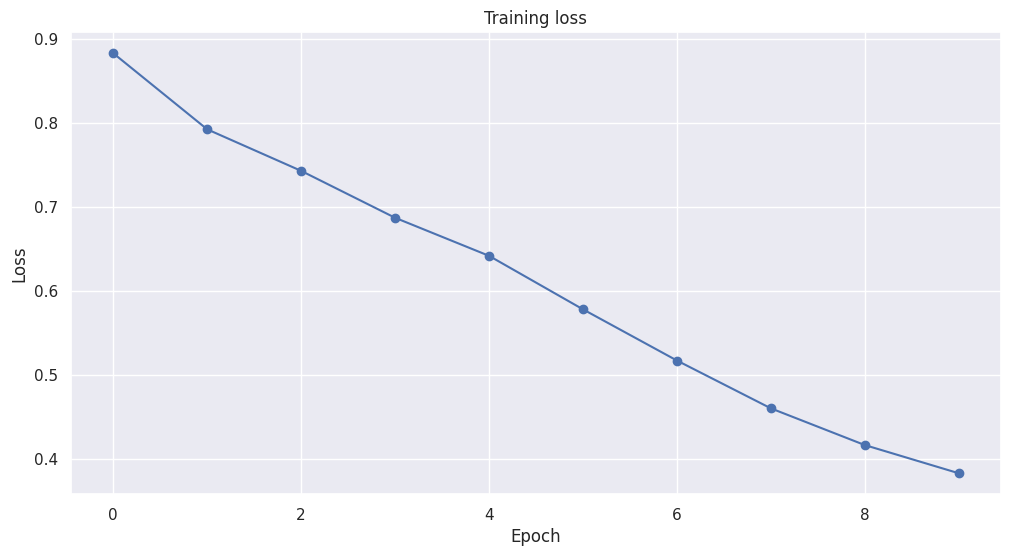

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (12, 6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 2,000 test sentences
 DONE.


In [ ]:
flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

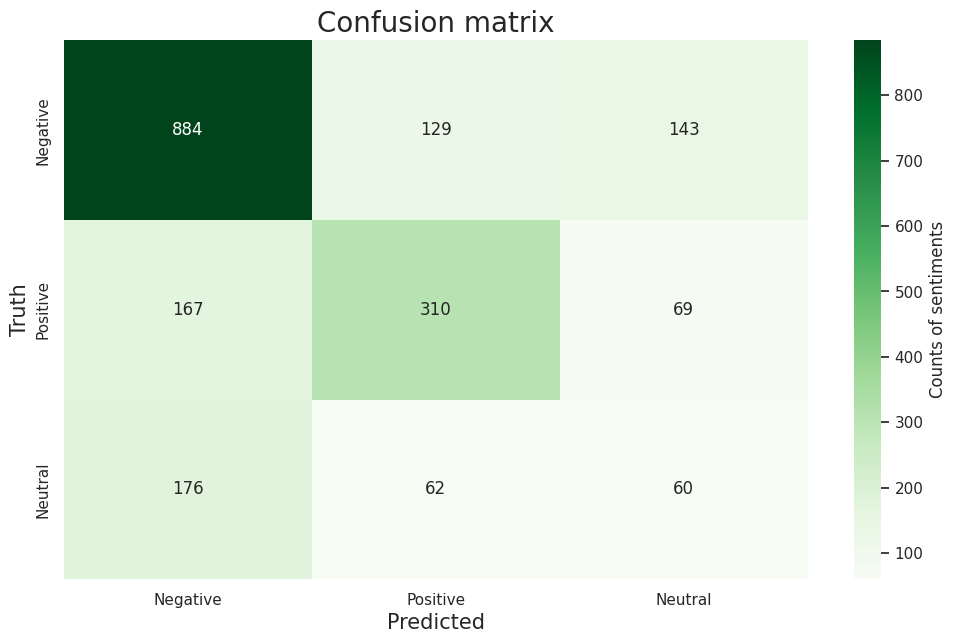

In [ ]:
# Menghitung confusion matrixflat_true_labels, flat_prediction
cm_hasil = confusion_matrix(flat_true_labels, flat_prediction)

# Plot confusion matrix
plt.figure(figsize=(12, 7))
sentiment_classes = ['Negative', 'Positive', 'Neutral']
sb.heatmap(cm_hasil, cmap=plt.cm.Greens, annot=True, cbar_kws={'label': 'Counts of sentiments'}, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

print(classification_report(flat_true_labels, flat_prediction))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1156
           1       0.62      0.57      0.59       546
           2       0.22      0.20      0.21       298

    accuracy                           0.63      2000
   macro avg       0.52      0.51      0.51      2000
weighted avg       0.62      0.63      0.62      2000



In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.331


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %.3f" %acc)

ACC: 0.627


In [ ]:
# Simpan model PyTorch ke file
torch.save(model.state_dict(), "model_pytorch.pt")
print("Model PyTorch saved.")



Model PyTorch saved.
